In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("student.csv")

# understanding the data set

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [8]:
df.shape

(2392, 15)

In [9]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [10]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
StudentID            2392 non-null int64
Age                  2392 non-null int64
Gender               2392 non-null int64
Ethnicity            2392 non-null int64
ParentalEducation    2392 non-null int64
StudyTimeWeekly      2392 non-null float64
Absences             2392 non-null int64
Tutoring             2392 non-null int64
ParentalSupport      2392 non-null int64
Extracurricular      2392 non-null int64
Sports               2392 non-null int64
Music                2392 non-null int64
Volunteering         2392 non-null int64
GPA                  2392 non-null float64
GradeClass           2392 non-null float64
dtypes: float64(3), int64(12)

In [11]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes.value_counts()

int64      12
float64     3
dtype: int64

In [14]:
df.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [15]:
print("min GPA:",df["GPA"].min())
print("max GPA:",df["GPA"].max())
df.nunique()

min GPA: 0.0
max GPA: 4.0


StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

# selecting variable to work on confidence interva;

In [16]:
gpa = df["GPA"]
n = gpa.shape[0] # sample size
n

2392

In [17]:
mean_gpa = np.mean(gpa)
print("sample mean of gpa:",mean_gpa)

sample mean of gpa: 1.9061863027265407


In [18]:
std_gpa = np.std(gpa,ddof=1)
print("sample std of gpa:",std_gpa)

sample std of gpa: 0.9151558203249592


In [19]:
std_error = std_gpa/np.sqrt(n)
print("standard error:",std_error)

standard error: 0.018711752243474537


# confidence interval based on
# z and t distribution

# use of z
only use z when we know std of population
and data is large enough and mainly for proportion
1. it is quite narrow since suitable for large data

In [20]:
z = stats.norm.ppf(0.975)
margin_error = z*std_error
print("margin of error:",margin_error)
CI = (mean_gpa-margin_error,mean_gpa+margin_error)
CI

margin of error: 0.036674360484846645


(1.869511942241694, 1.9428606632113874)

# use of t
1. use when std and mean is unknow of the population
2. it gives slightly wide ci

In [21]:
dfree = n-1
t = stats.t.ppf(0.975,df=dfree)
margin_error_t = t*std_error
ci_t = (mean_gpa-margin_error_t,mean_gpa+margin_error_t)
ci_t

(1.8694933678173924, 1.942879237635689)

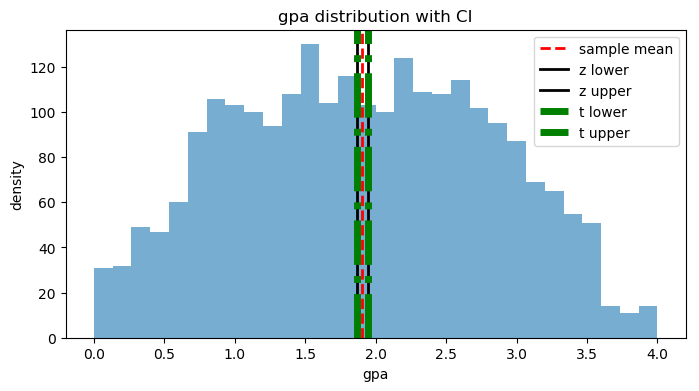

In [22]:
plt.figure(figsize=(8,4))
plt.hist(gpa,bins=30,alpha=0.6)
plt.axvline(mean_gpa,linestyle='--',linewidth=2,label="sample mean",color='red')
plt.axvline(CI[0],linewidth=2,label="z lower",color='black')
plt.axvline(CI[1],linewidth=2,label="z upper",color='black')
plt.axvline(ci_t[0],linestyle='-.',linewidth=5,label="t lower",color="green")
plt.axvline(ci_t[1],linestyle='-.',linewidth=5,label="t upper",color="green")
plt.title("gpa distribution with CI")
plt.legend()
plt.xlabel("gpa")
plt.ylabel("density")
plt.show()

# CI for different sample size


In [39]:
def ci(sample,confidence=0.95):
    n = len(sample)
    mean_s = sample.mean()
    std_s = sample.std(ddof=1)
    se = std_s/np.sqrt(n)
    t = stats.t.ppf(0.975,df=n-1)
    mrg_err = t*se
    ci_t = (mean_s-mrg_err,mean_s+mrg_err)
    return ci_t[0], ci_t[1]

In [45]:
sample_sizes= [10,50,100,300]

In [70]:
results = []
for i in sample_sizes:
    sample = gpa.sample(n=i,random_state=42)
    l,u = ci(sample)
    width = u-l
    results.append({
        "sample size":i,
        "ci lower":l,
        "ci upper":u,
        "ci width":width
    })
df1 = pd.DataFrame(results)
df1["inv_sqrtn"] = 1/np.sqrt(df1["sample size"])
df1

,ci lower,ci upper,ci width,sample size,inv_sqrtn
0,1.308401,2.744928,1.436526,10,0.316228
1,1.781203,2.289468,0.508265,50,0.141421
2,1.800989,2.166309,0.365321,100,0.100000
3,1.757518,1.972178,0.214660,300,0.057735


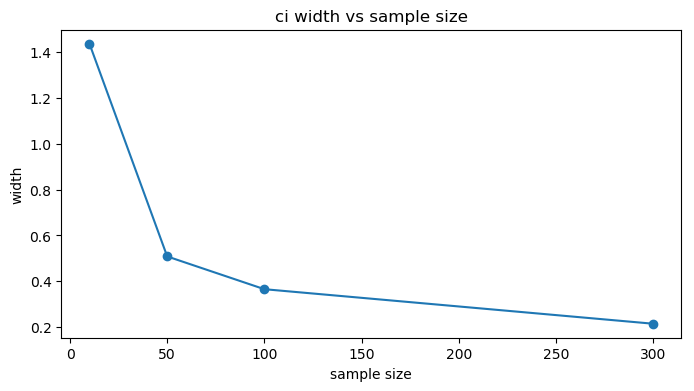

In [74]:
plt.figure(figsize = (8,4))
plt.plot(df1["sample size"],df1["ci width"],marker='o')
plt.xlabel("sample size")
plt.ylabel("width")
plt.title("ci width vs sample size")
plt.show()

# testing different confidence level for precision and uncertainity tradeoff

In [84]:
def ci_for_level(sample,confidence):
    n = len(sample)
    mean_s = sample.mean()
    std_s = sample.std(ddof=1)
    se = std_s/np.sqrt(n)
    t = stats.t.ppf(0.975,df=n-1)
    mrg_err = t*se
    ci_t = (mean_s-mrg_err,mean_s+mrg_err)
    return ci_t[0], ci_t[1]

In [85]:
confidence = [0.90,0.95,0.99]
results = []
for j in confidence:
    l,u = ci_for_level(gpa,confidence=j)
    width = u-l
    results.append({
        "confidence level":j,
        "ci lower":l,
        "ci upper":u,
        "ci width":width
    })
df2 = pd.DataFrame(results)
df2


,ci lower,ci upper,ci width,confidence level
0,1.869493,1.942879,0.073386,0.90
1,1.869493,1.942879,0.073386,0.95
2,1.869493,1.942879,0.073386,0.99


# assumptions
1. sample size reasonably large ? here yes 
2. extreme outlier not there here
3. random sampling here it might be wrong since the kaggle data set we dont know how data is collected
4. bias risk may be there 
5. conclusions should be based on population we assume not for all the students in the city or world only for population we sampled

# conecting ci to hypothesis testing 

In [92]:
t_stat,p_value = stats.ttest_1samp(gpa,popmean=3.0)
print("t_stst:",t_stat,"pvalue:",p_value)
conclusion = '''we reject ho null hypothesis since we considered 3 
as null hypothesis its outside the intervalso reject it'''
conclusion

t_stst: -58.45597371325348 pvalue: 0.0


'we reject ho null hypothesis since we considered 3 \nas null hypothesis its outside the intervalso reject it'

# two group comparison 

In [95]:
df["Gender"].value_counts()

1    1222
0    1170
Name: Gender, dtype: int64

In [96]:
gpa_m = df[df["Gender"] == 1]["GPA"]
gpa_f = df[df["Gender"] == 0]["GPA"]
# h0 average gpa is same for both groups
# h1 average gpa is different for both groups

In [98]:
ci_m = ci(gpa_m,confidence=0.95)
ci_f = ci(gpa_f,confidence=0.95)
ci_m,ci_f

((1.8427879348695089, 1.94566268560847),
 (1.8662542120036572, 1.9711035777567536))

In [99]:
t_stats,p_value = stats.ttest_ind(gpa_m,gpa_f,equal_var=False)
print("0 lies bw below intervals so dont reject null hypothesis")
t_stats,p_value

0 lies bw below intervals so dont reject null hypothesis


(-0.6532351689605722, 0.5136676190960222)